# Bipartite two level systems: density matrix

The *Permutational Invariant Quantum Solver (PIQS)* is an open-source Python solver to study the exact Lindbladian dynamics of open quantum systems consisting of identical qubits. It is integrated in QuTiP and can be imported as a model.

This tutorial is meant to check whether the results obtained with the PIQS method are equivalent to the ones obtained with QuTiP standard approach. The PIQS method represents the density matrix of the states in the Dicke basis whereas the QuTiP standard approach is to exploit the uncupled basis. The Dicke basis is degenerate with respect to the uncoupled one (hence it contains fewer states) and it is precisely this degeneracy that is at the core of the PIQS method. As a matter of fact, this degeneracy captures the permutational ivariance of the system. The master equation which describes the physics involved is in fact invariant under permutations of TLSs. The Dicke basis, which consists of the eigenstates of the collecitve spin operator, captures this invariance and it represents the system without loss of information. Every possible states is represented in the Dicke basis as a block diagonal matrix.

The equivalence between the two methods is proven for the simple case of one species TLSs both with and without a common bosonic coupling. The original step is thus to prove that this equivalence is valid for two species in a bosonic cavity as well.

This is achieved in the following way:

1. The initial density matrix is prepared in the Dicke basis and converted to the uncoupled basis.
2. Each initial state is passed to the corresponding method and the master equation is solved in both cases
3. The resulting density matrices are compared: To do so the density matrix in the unoupled basis is reconverted to the Dicke basis.
4. It is useful to look at the difference between the density matrices elements obtained with the two methods. 

We expect to obeserve small discrepancies in the elements of the two matrices if the methods are equivalent. These are evaluated by taking the absolute relative difference between the values.

In [1]:
%load_ext autotime
%load_ext autoreload
%autoreload 2

time: 40 ms


In [2]:
import library

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import linalg

from qutip import *
from qutip import piqs

time: 4.68 s


In [3]:
plt.rcParams["figure.figsize"] = (12,8)

time: 107 ms


In [4]:
def plot_state (density):
    density_real = np.absolute(density)
    fig = plt.figure(figsize=(4, 3))
    label_size = 16

    plt.rc('xtick', labelsize=label_size) 
    plt.rc('ytick', labelsize=label_size)

    ax1 = fig.add_subplot(111)
    ax1.set_title('density matrix', fontsize=label_size)
    ax1.set_xticks([])
    ax1.set_yticks([])
    im1 = ax1.imshow(density_real, interpolation='None', cmap='Blues', norm=mpl.colors.LogNorm())
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.10)
    fig.colorbar(im1, cax=cax, orientation='vertical')

    plt.show()
    plt.close()

time: 64.1 ms


<h1><center> One species: 2 TLSs </center></h1>
\begin{eqnarray}
H_\text{TLS}&=&\hbar\omega_0 J_z+\hbar\omega_x J_x 
\end{eqnarray}

\begin{eqnarray}
\dot{\rho} = \mathcal{D}_\text{TLS}(\rho)
&=&-\frac{i}{\hbar}\lbrack H_\text{TLS},\rho \rbrack\\
&&+\frac{\gamma_\Downarrow}{2}\mathcal{L}_{J_{-}}[\rho]
+\frac{\gamma_\Phi}{2}\mathcal{L}_{J_{z}}[\rho]
+\frac{\gamma_\Uparrow}{2}\mathcal{L}_{J_{+}}[\rho]\\
&&+\sum_{n=1}^{N}\left(
\frac{\gamma_\text{E}}{2}\mathcal{L}_{J_{-,n}}[\rho]
+\frac{\gamma_\text{D}}{2}\mathcal{L}_{J_{z,n}}[\rho]
+\frac{\gamma_\text{P}}{2}\mathcal{L}_{J_{+,n}}[\rho]\right)
\end{eqnarray}

In [5]:
N = 2

time: 75 ms


In [6]:
unc_to_dicke = [[1.,0,0,0],
                [0,1/np.sqrt(2), 1/np.sqrt(2),0],
                [0,0,0,1.],
                [0,1/np.sqrt(2), -1/np.sqrt(2),0]]
dicke_to_unc = linalg.inv(unc_to_dicke)

time: 103 ms


In [7]:
dicke_to_unc

array([[ 1.        , -0.        , -0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.        ,  0.70710678],
       [ 0.        ,  0.70710678,  0.        , -0.70710678],
       [ 0.        ,  0.        ,  1.        ,  0.        ]])

time: 44.7 ms


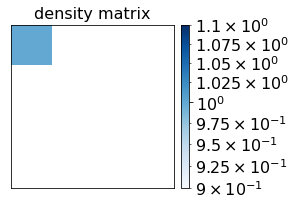

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

time: 2.18 s


In [8]:
initial_state_piqs = piqs.excited(N)
plot_state(initial_state_piqs)
np.real(initial_state_piqs)

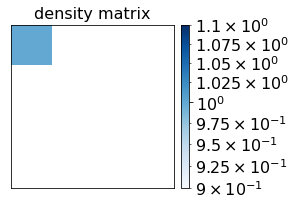

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

time: 1.62 s


In [9]:
initial_state_qutip = Qobj(np.dot(np.dot(dicke_to_unc, initial_state_piqs), unc_to_dicke))
plot_state(initial_state_qutip)
np.real(initial_state_qutip)

#### Time evolution and transformation

In [10]:
piqs_state = library.one_species_piqs_mesolve(2, initial_state_piqs)[-1]
piqs_state = np.array(piqs_state)
np.real(piqs_state)

array([[ 2.50261872e-01, -8.78834802e-06, -1.03745349e-07,
         0.00000000e+00],
       [-8.78834802e-06,  2.50122164e-01, -5.45323078e-06,
         0.00000000e+00],
       [-1.03745349e-07, -5.45323078e-06,  2.49920068e-01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.49695896e-01]])

time: 876 ms


In [11]:
qutip_state = np.array(library.one_species_qutip_mesolve(2, initial_state_qutip)[-1])
np.real(qutip_state)

array([[ 2.50261874e-01, -6.21436921e-06, -6.21436921e-06,
        -1.03755806e-07],
       [-6.21436921e-06,  2.49909030e-01,  2.13139228e-04,
        -3.85575156e-06],
       [-6.21436921e-06,  2.13139228e-04,  2.49909030e-01,
        -3.85575156e-06],
       [-1.03755806e-07, -3.85575156e-06, -3.85575156e-06,
         2.49920065e-01]])

time: 892 ms


In [12]:
qutip_state_transformed = np.dot(np.dot(unc_to_dicke, qutip_state), dicke_to_unc)

time: 62.2 ms


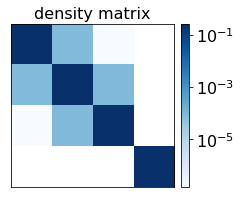

array([[ 2.50261872e-01-3.40705013e-20j, -8.78834802e-06+8.16776296e-05j,
        -1.03745349e-07-8.70240433e-08j,  0.00000000e+00+0.00000000e+00j],
       [-8.78834802e-06-8.16776296e-05j,  2.50122164e-01-1.09495335e-21j,
        -5.45323078e-06+8.35901216e-05j,  0.00000000e+00+0.00000000e+00j],
       [-1.03745349e-07+8.70240433e-08j, -5.45323078e-06-8.35901216e-05j,
         2.49920068e-01+3.32676454e-20j,  0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  2.49695896e-01+1.89780926e-21j]])

time: 635 ms


In [13]:
plot_state(piqs_state)
piqs_state

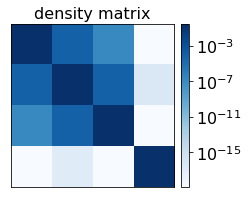

array([[ 2.50261874e-01+5.59280031e-21j, -8.78844522e-06+8.16775426e-05j,
        -1.03755806e-07-8.70421300e-08j, -6.33177556e-20+5.03475674e-19j],
       [-8.78844522e-06-8.16775426e-05j,  2.50122170e-01+3.98567234e-21j,
        -5.45285615e-06+8.35904513e-05j,  4.20885445e-17+1.63277796e-20j],
       [-1.03755806e-07+8.70421300e-08j, -5.45285615e-06-8.35904513e-05j,
         2.49920065e-01-7.47153290e-21j,  9.39103030e-20+5.76240878e-20j],
       [-1.12943429e-19-2.32600930e-19j,  1.67729317e-17-4.43921858e-21j,
        -4.53585109e-20-3.86046636e-19j,  2.49695891e-01-2.10693975e-21j]])

time: 761 ms


In [14]:
plot_state(qutip_state_transformed)
qutip_state_transformed

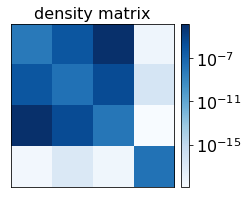

max value =  0.00014498263395351768
mean value =  1.869699130078565e-05


array([[ 7.67119259e-09, -9.26801305e-07,  1.44982634e-04,
         5.07441516e-19],
       [-9.26801305e-07,  2.24131990e-08,  3.63638788e-06,
         4.20885477e-17],
       [ 1.44982634e-04,  3.63638789e-06, -1.09885850e-08,
         1.10180218e-19],
       [ 2.58571868e-19,  1.67729323e-17,  3.88702200e-19,
        -1.91415937e-08]])

time: 1.14 s


In [15]:
mask = (piqs_state == 0)
qutip_state_transformed = np.absolute(qutip_state_transformed)
piqs_state = np.absolute(piqs_state)
rel_diff = np.divide(qutip_state_transformed-piqs_state, qutip_state_transformed)
rel_diff[mask] = qutip_state_transformed[mask]
plot_state(rel_diff)
print('max value = ', np.absolute(rel_diff).max())
print('mean value = ', np.absolute(rel_diff).mean())
rel_diff

<h1><center> One species: 2 TLSs in driven leaky cavity</center></h1>
\begin{eqnarray}
H_\text{TLS}&=&\hbar\omega_0 J_z+\hbar\omega_x J_x 
\quad \quad \quad 
H_\text{phot} = \hbar \omega_c a^\dagger a
\quad \quad \quad
H_\text{int} = \hbar g (a^\dagger + a) J_x
\end{eqnarray}

\begin{eqnarray}
\dot{\rho} = \mathcal{D}_\text{TLS}(\rho)+\mathcal{D}_\text{phot}(\rho) -\frac{i}{\hbar}\lbrack H_\text{int}, \rho\rbrack
&=&-\frac{i}{\hbar}\lbrack H_\text{TLS}+H_\text{phot}+H_\text{int},\rho \rbrack\\
&&+\frac{\gamma_\Downarrow}{2}\mathcal{L}_{J_{-}}[\rho]
+\frac{\gamma_\Phi}{2}\mathcal{L}_{J_{z}}[\rho]
+\frac{\gamma_\Uparrow}{2}\mathcal{L}_{J_{+}}[\rho]\\
&&+\frac{w_p}{2}\mathcal{L}_{a^\dagger}[\rho]
+\frac{\kappa}{2}\mathcal{L}_{a}[\rho]\\
&&+\sum_{n=1}^{N}\left(
\frac{\gamma_\text{E}}{2}\mathcal{L}_{J_{-,n}}[\rho]
+\frac{\gamma_\text{D}}{2}\mathcal{L}_{J_{z,n}}[\rho]
+\frac{\gamma_\text{P}}{2}\mathcal{L}_{J_{+,n}}[\rho]\right)
\end{eqnarray}

In [16]:
N = 2

time: 58.6 ms


In [17]:
unc_to_dicke = [[1.,0,0,0],
                [0,1/np.sqrt(2), 1/np.sqrt(2),0],
                [0,0,0,1.],
                [0,1/np.sqrt(2), -1/np.sqrt(2),0]]
dicke_to_unc = linalg.inv(unc_to_dicke)

id_phot = [[1.,0.],[0.,1.]]
unc_dicke_phot = np.kron(unc_to_dicke, id_phot) 

dicke_unc_phot = linalg.inv(unc_dicke_phot)

time: 75 ms


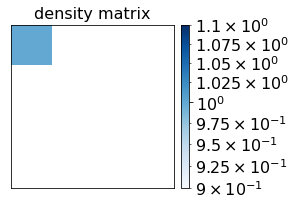

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

time: 1.79 s


In [18]:
initial_state_piqs = piqs.excited(N)
plot_state(initial_state_piqs)
np.real(initial_state_piqs)

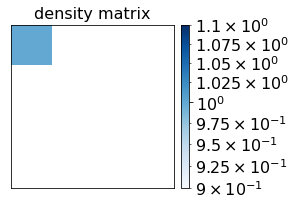

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

time: 1.62 s


In [19]:
initial_state_qutip = Qobj(np.dot(np.dot(dicke_to_unc, initial_state_piqs), unc_to_dicke))
plot_state(initial_state_qutip)
np.real(initial_state_qutip)

#### Time evolution and transformation

In [20]:
piqs_state = np.array(library.one_species_piqs_mesolve(2,initial_state_piqs,2)[-1])
np.real(piqs_state)

array([[ 1.26232310e-01, -1.07762911e-04, -8.34536987e-04,
        -8.20420742e-03, -1.06310861e-03,  1.21076555e-05,
         0.00000000e+00,  0.00000000e+00],
       [-1.07762911e-04,  1.00692893e-01, -9.03347659e-03,
        -9.24977295e-04,  6.99104228e-05,  1.41600890e-03,
         0.00000000e+00,  0.00000000e+00],
       [-8.34536987e-04, -9.03347659e-03,  1.28906831e-01,
         1.96932792e-04, -1.19724454e-03, -8.22538958e-03,
         0.00000000e+00,  0.00000000e+00],
       [-8.20420742e-03, -9.24977295e-04,  1.96932792e-04,
         1.20670773e-01, -9.99842659e-03, -7.13711225e-04,
         0.00000000e+00,  0.00000000e+00],
       [-1.06310861e-03,  6.99104228e-05, -1.19724454e-03,
        -9.99842659e-03,  1.51893626e-01,  4.45297753e-04,
         0.00000000e+00,  0.00000000e+00],
       [ 1.21076555e-05,  1.41600890e-03, -8.22538958e-03,
        -7.13711225e-04,  4.45297753e-04,  1.21869277e-01,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.000000

time: 1.83 s


In [21]:
qutip_state = library.one_species_qutip_mesolve(2,initial_state_qutip,2)[-1]
np.real(qutip_state)

array([[ 1.26232310e-01, -1.07763013e-04, -5.90106709e-04,
        -5.80125123e-03, -5.90106709e-04, -5.80125123e-03,
        -1.06310903e-03,  1.21077221e-05],
       [-1.07763013e-04,  1.00692893e-01, -6.38763287e-03,
        -6.54057807e-04, -6.38763287e-03, -6.54057807e-04,
         6.99103723e-05,  1.41600907e-03],
       [-5.90106709e-04, -6.38763287e-03,  1.46462231e-01,
         1.12570577e-04, -1.75553977e-02,  8.43620184e-05,
        -8.46579712e-04, -5.81622919e-03],
       [-5.80125123e-03, -6.54057807e-04,  1.12570577e-04,
         1.03193716e-01,  8.43620184e-05,  1.74770592e-02,
        -7.06995471e-03, -5.04670070e-04],
       [-5.90106709e-04, -6.38763287e-03, -1.75553977e-02,
         8.43620184e-05,  1.46462231e-01,  1.12570577e-04,
        -8.46579712e-04, -5.81622919e-03],
       [-5.80125123e-03, -6.54057807e-04,  8.43620184e-05,
         1.74770592e-02,  1.12570577e-04,  1.03193716e-01,
        -7.06995471e-03, -5.04670070e-04],
       [-1.06310903e-03,  6.991037

time: 1.79 s


In [22]:
qutip_state_transformed = np.dot(np.dot(unc_dicke_phot, qutip_state), dicke_unc_phot)

time: 93.8 ms


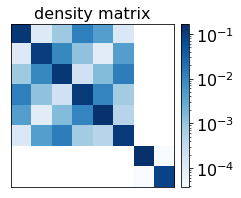

array([[ 1.26232310e-01+5.00696528e-19j, -1.07762911e-04+9.36282349e-07j,
        -8.34536987e-04+1.00495159e-04j, -8.20420742e-03+9.67689298e-03j,
        -1.06310861e-03+4.20379733e-03j,  1.21076555e-05-1.26210515e-04j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [-1.07762911e-04-9.36282349e-07j,  1.00692893e-01-2.41380496e-18j,
        -9.03347659e-03-2.91328098e-03j, -9.24977295e-04-6.85699455e-04j,
         6.99104228e-05+6.55010915e-05j,  1.41600890e-03-4.20647038e-03j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [-8.34536987e-04-1.00495159e-04j, -9.03347659e-03+2.91328098e-03j,
         1.28906831e-01-1.06851679e-18j,  1.96932792e-04-3.18610857e-05j,
        -1.19724454e-03-8.41786807e-04j, -8.22538958e-03+1.05044061e-02j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [-8.20420742e-03-9.67689298e-03j, -9.24977295e-04+6.85699455e-04j,
         1.96932792e-04+3.18610857e

time: 1.41 s


In [23]:
plot_state(piqs_state)
np.array(piqs_state)

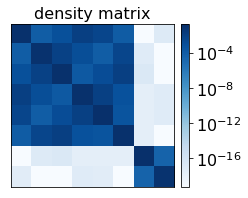

array([[ 1.26232310e-01+1.15871197e-18j, -1.07763013e-04+9.36255184e-07j,
        -8.34536912e-04+1.00495158e-04j, -8.20420817e-03+9.67689280e-03j,
        -1.06310903e-03+4.20379690e-03j,  1.21077221e-05-1.26210509e-04j,
        -1.21689110e-20-3.92818559e-19j,  8.14706575e-19-1.01532147e-17j],
       [-1.07763013e-04-9.36255184e-07j,  1.00692893e-01+1.12722399e-18j,
        -9.03347704e-03-2.91328095e-03j, -9.24977421e-04-6.85699462e-04j,
         6.99103723e-05+6.55010371e-05j,  1.41600907e-03-4.20647058e-03j,
        -5.35843216e-18+6.85020936e-18j,  3.76824295e-19-2.00059563e-19j],
       [-8.34536912e-04-1.00495158e-04j, -9.03347704e-03+2.91328095e-03j,
         1.28906833e-01+5.79162976e-19j,  1.96932595e-04-3.18611595e-05j,
        -1.19724451e-03-8.41786690e-04j, -8.22539021e-03+1.05044069e-02j,
        -2.65194272e-17+5.86750307e-18j, -7.88897540e-19-8.82432577e-19j],
       [-8.20420817e-03-9.67689280e-03j, -9.24977421e-04+6.85699462e-04j,
         1.96932595e-04+3.18611595e

time: 820 ms


In [24]:
plot_state(qutip_state_transformed)
qutip_state_transformed

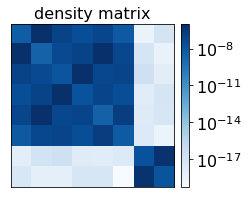

max value =  9.440747374081767e-07
mean value =  1.2756320462217705e-07


array([[ 4.96022548e-09,  9.44074736e-07, -8.93787313e-08,
         2.77500082e-08, -7.22641492e-08,  7.41819259e-09,
         3.93007001e-19,  1.01858487e-17],
       [ 9.44074737e-07,  2.60181475e-09,  4.35567901e-08,
         9.11753470e-08, -7.72993473e-07,  5.55338840e-08,
         8.69702038e-18,  4.26638462e-19],
       [-8.93787317e-08,  4.35567901e-08,  1.23791729e-08,
        -9.13335530e-07, -5.97740535e-08,  7.84915971e-08,
         2.71607734e-17,  1.18365814e-18],
       [ 2.77500095e-08,  9.11753462e-08, -9.13335533e-07,
         1.51199637e-08, -8.52482667e-08,  2.93166750e-08,
         1.74004739e-18,  9.36876779e-18],
       [-7.22641472e-08, -7.72993481e-07, -5.97740545e-08,
        -8.52482665e-08, -3.05023279e-09, -1.62812498e-07,
         2.28577850e-18,  7.59310086e-18],
       [ 7.41819345e-09,  5.55338857e-08,  7.84915975e-08,
         2.93166750e-08, -1.62812502e-07,  6.14839075e-09,
         3.06452120e-18,  2.73106635e-19],
       [ 9.23701622e-19,  1.513000

time: 598 ms


In [25]:
mask = (piqs_state == 0)
qutip_state_transformed = np.absolute(qutip_state_transformed)
piqs_state = np.absolute(piqs_state)
rel_diff = np.divide(qutip_state_transformed-piqs_state, qutip_state_transformed)
rel_diff[mask] = qutip_state_transformed[mask]
plot_state(rel_diff)
print('max value = ', np.absolute(rel_diff).max())
print('mean value = ', np.absolute(rel_diff).mean())
rel_diff

<h1><center> Two species: 2 TLSs each </center></h1>
\begin{eqnarray}
H_\text{TLS}^{(1)}&=&\hbar\omega_{0}^{(1)} J_{z}^{(1)}+\hbar\omega_{x}^{(1)} J_{x}^{(1)} \quad \quad
H_\text{TLS}^{(2)}&=&\hbar\omega_{0}^{(2)} J_{z}^{(2)}+\hbar\omega_{x}^{(2)} J_{x}^{(2)}
\end{eqnarray}

\begin{eqnarray}
\dot{\rho} = \mathcal{D}_\text{TLS}(\rho)&=& 
-\frac{i}{\hbar}\lbrack H_\text{TLS}^{(1)} 
+H_\text{TLS}^{(2)},\rho \rbrack\\
&&
+\frac{\gamma_\Downarrow}{2}\mathcal{L}_{J_-}[\rho]
+\frac{\gamma_\Phi}{2}\mathcal{L}_{J_z}[\rho]
+\frac{\gamma_\Uparrow}{2}\mathcal{L}_{J_+}[\rho]\\
&&
+\sum_{n=1}^{N_1}\frac{\gamma_\downarrow^{(1)}}{2}\mathcal{L}_{J_{-,n}^{(1)}}[\rho] 
+\frac{\gamma_\phi^{(1)}}{2}\mathcal{L}_{J_{z,n}^{(1)}}[\rho] 
+\frac{\gamma_\uparrow^{(1)}}{2}\mathcal{L}_{J_{+,n}^{(1)}}[\rho] \\
&&
+\sum_{n=1}^{N_2}\frac{\gamma_\downarrow^{(2)}}{2}\mathcal{L}_{J_{-,n}^{(2)}}[\rho]
+\frac{\gamma_\phi^{(2)}}{2}\mathcal{L}_{J_{z,n}^{(2)}}[\rho]
+\frac{\gamma_\uparrow^{(2)}}{2}\mathcal{L}_{J_{+,n}^{(2)}}[\rho]
\end{eqnarray}

In [26]:
N1 = 2
N2 = 2

time: 93.6 ms


In [27]:
unc_to_dicke = [[1.,0,0,0],
                [0,1/np.sqrt(2),1/np.sqrt(2),0],
                [0,0,0,1.],
                [0,1/np.sqrt(2),-1/np.sqrt(2),0]]
dicke_to_unc = linalg.inv(unc_to_dicke)

unc_dicke_two = np.kron(unc_to_dicke, unc_to_dicke)

dicke_unc_two = linalg.inv(unc_dicke_two)

time: 67 ms


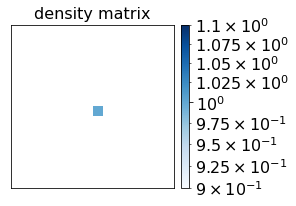

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

time: 976 ms


In [28]:
initial_state_piqs_1 = piqs.ground(N1)
initial_state_piqs_2 = piqs.excited(N2)
plot_state(tensor(initial_state_piqs_1, initial_state_piqs_2))
np.real(tensor(initial_state_piqs_1, initial_state_piqs_2))

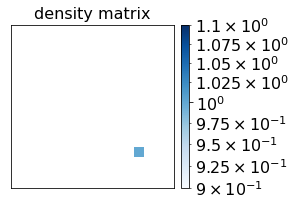

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

time: 1.3 s


In [29]:
initial_state_qutip_1 = Qobj(np.dot(np.dot(dicke_to_unc, initial_state_piqs_1), unc_to_dicke))
initial_state_qutip_2 = Qobj(np.dot(np.dot(dicke_to_unc, initial_state_piqs_2), unc_to_dicke))
plot_state(tensor(initial_state_qutip_1, initial_state_qutip_2))
np.real(tensor(initial_state_qutip_1, initial_state_qutip_2))

#### Time evolution and transformation

In [30]:
piqs_state = np.array(library.two_species_piqs_mesolve(N1,N2,initial_state_piqs_1,initial_state_piqs_2)[-1])
np.real(piqs_state)

array([[ 6.24912761e-02,  3.44210419e-06, -6.93919562e-10,
         0.00000000e+00, -3.37165736e-06,  1.39425038e-09,
         1.88738439e-13,  0.00000000e+00, -7.00485964e-10,
        -1.92619709e-13, -1.20150171e-16,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.44210419e-06,  6.25047643e-02,  3.51325769e-06,
         0.00000000e+00, -2.04784960e-05, -3.44287008e-06,
         1.38783912e-09,  0.00000000e+00,  7.52443605e-10,
        -6.97323039e-10, -1.88738439e-13,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-6.93919562e-10,  3.51325769e-06,  6.25152225e-02,
         0.00000000e+00, -7.65888349e-10, -2.04797461e-05,
        -3.51325769e-06,  0.00000000e+00,  2.12198471e-09,
         7.65888349e-10, -6.93919562e-10,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e

time: 1.34 s


In [31]:
qutip_state = library.two_species_qutip_mesolve(N1,N2,initial_state_qutip_1,initial_state_qutip_2)[-1]
np.real(qutip_state)

array([[ 6.24912761e-02,  2.43393521e-06,  2.43393521e-06,
        -6.93919562e-10, -2.38412178e-06,  6.97125187e-10,
         6.97125187e-10,  1.33458228e-13, -2.38412178e-06,
         6.97125187e-10,  6.97125187e-10,  1.33458228e-13,
        -7.00485964e-10, -1.36202703e-13, -1.36202703e-13,
        -1.20150149e-16],
       [ 2.43393521e-06,  6.24945245e-02,  1.02398731e-05,
         2.48424834e-06, -1.02392480e-05, -2.43393521e-06,
        -5.41564844e-10,  6.93919562e-10, -1.02392480e-05,
        -2.43393521e-06, -5.41564844e-10,  6.93919562e-10,
         5.32057976e-10, -6.97125187e-10, -1.97851827e-13,
        -1.33458228e-13],
       [ 2.43393521e-06,  1.02398731e-05,  6.24945245e-02,
         2.48424834e-06, -1.02392480e-05, -5.41564844e-10,
        -2.43393521e-06,  6.93919562e-10, -1.02392480e-05,
        -5.41564844e-10, -2.43393521e-06,  6.93919562e-10,
         5.32057976e-10, -1.97851828e-13, -6.97125187e-10,
        -1.33458228e-13],
       [-6.93919562e-10,  2.48424834e

time: 2.74 s


In [32]:
qutip_state_transformed = np.dot(np.dot(unc_dicke_two, qutip_state), dicke_unc_two)

time: 43.6 ms


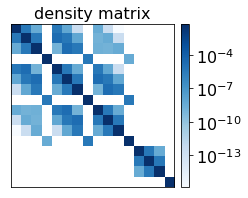

array([[ 6.24912761e-02+7.24438309e-22j,  3.44210419e-06-3.59614560e-06j,
        -6.93919562e-10-3.90105576e-09j,  0.00000000e+00+0.00000000e+00j,
        -3.37165736e-06+3.69711118e-06j,  1.39425038e-09+7.80303819e-09j,
         1.88738439e-13+2.19249101e-13j,  0.00000000e+00+0.00000000e+00j,
        -7.00485964e-10-3.90263957e-09j, -1.92619709e-13-2.17515049e-13j,
        -1.20150171e-16-2.43243812e-17j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 3.44210419e-06+3.59614560e-06j,  6.25047643e-02+9.08644417e-22j,
         3.51325769e-06-3.49606540e-06j,  0.00000000e+00+0.00000000e+00j,
        -2.04784960e-05+1.35311377e-20j, -3.44287008e-06+3.59713789e-06j,
         1.38783912e-09+7.80211153e-09j,  0.00000000e+00+0.00000000e+00j,
         7.52443605e-10-1.01207677e-09j, -6.97323039e-10-3.90264728e-09j,
        -1.88738439e-13-2.19249101e-1

time: 491 ms


In [33]:
plot_state(piqs_state)
np.array(piqs_state)

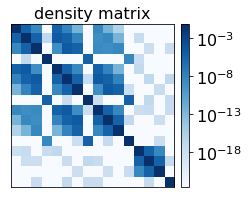

array([[ 6.24912761e-02-4.61256186e-22j,  3.44210419e-06-3.59614560e-06j,
        -6.93919562e-10-3.90105576e-09j,  2.63333120e-19-1.15690859e-19j,
        -3.37165736e-06+3.69711118e-06j,  1.39425037e-09+7.80303819e-09j,
         1.88738437e-13+2.19249099e-13j, -3.97054434e-21-1.52079112e-21j,
        -7.00485964e-10-3.90263957e-09j, -1.92619710e-13-2.17515050e-13j,
        -1.20150149e-16-2.43244820e-17j, -2.93651150e-23-4.27870538e-24j,
        -3.97606273e-19-3.58664269e-19j,  4.25307852e-21-6.66833607e-21j,
         1.46124400e-22+7.32661221e-24j, -7.81042044e-21+4.71370829e-21j],
       [ 3.44210419e-06+3.59614560e-06j,  6.25047643e-02+3.59137254e-22j,
         3.51325769e-06-3.49606540e-06j,  1.17812116e-17+4.85760001e-22j,
        -2.04784960e-05+1.73536952e-22j, -3.44287007e-06+3.59713789e-06j,
         1.38783912e-09+7.80211153e-09j, -2.99844311e-20-4.31866033e-20j,
         7.52443605e-10-1.01207677e-09j, -6.97323039e-10-3.90264728e-09j,
        -1.88738437e-13-2.19249099e-1

time: 908 ms


In [34]:
plot_state(qutip_state_transformed)
qutip_state_transformed

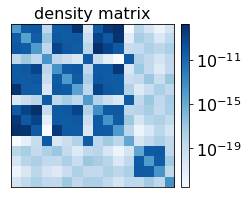

max value =  1.5862200773462303e-08
mean value =  5.021211317154808e-10


array([[ 1.23251960e-14,  4.65365772e-11, -7.84435874e-11,
         2.87625984e-19,  5.02912519e-11, -5.28775913e-11,
        -9.74083837e-09,  4.25182643e-21, -6.15266995e-11,
         5.04499926e-09, -1.31786931e-08,  2.96751967e-23,
         5.35472508e-19,  7.90919610e-21,  1.46307961e-22,
         9.12259356e-21],
       [ 4.65357264e-11, -4.44055360e-15,  4.40552067e-11,
         1.17812116e-17, -8.50170839e-11,  4.68051043e-11,
        -6.56689529e-11,  5.25751730e-20, -1.12289702e-09,
        -6.91010630e-11, -9.57422220e-09,  8.22714610e-22,
         3.05328444e-18,  5.32795828e-19,  3.86818357e-21,
         2.08993683e-19],
       [-7.84465101e-11,  4.40560612e-11, -1.15435079e-14,
         2.92663159e-19,  1.08707336e-09, -7.92697008e-11,
         4.40100896e-11,  4.84792713e-19,  1.58622008e-08,
         1.03446031e-09, -6.18851209e-11,  8.79883874e-20,
         1.66071004e-19,  1.56418003e-18,  3.55376732e-19,
         1.94592450e-18],
       [ 2.84899605e-19,  9.83351601e

time: 852 ms


In [35]:
mask = (piqs_state == 0)
qutip_state_transformed = np.absolute(qutip_state_transformed)
piqs_state = np.absolute(piqs_state)
rel_diff = np.divide(qutip_state_transformed-piqs_state, qutip_state_transformed)
rel_diff[mask] = qutip_state_transformed[mask]
plot_state(rel_diff)
print('max value = ', np.absolute(rel_diff).max())
print('mean value = ', np.absolute(rel_diff).mean())
rel_diff

<h1><center> Two species: 2 TLSs each in driven leaky cavity </center></h1>

\begin{eqnarray}
H_\text{TLS}^{(1)}&=&\hbar\omega_{0}^{(1)} J_{z}^{(1)}+\hbar\omega_{x}^{(1)} J_{x}^{(1)} \quad \quad
H_\text{TLS}^{(2)}&=&\hbar\omega_{0}^{(2)} J_{z}^{(2)}+\hbar\omega_{x}^{(2)} J_{x}^{(2)} \quad \quad
H_\text{phot} = \hbar \omega_c a^\dagger a \quad \quad
H_\text{int} = \hbar g (a^\dagger + a) (J_x^{(1)}+J_x^{(2)})
\end{eqnarray}

\begin{eqnarray}
\dot{\rho} = \mathcal{D}_\text{TLS}^{(1)}(\rho)+\mathcal{D}_\text{TLS}^{(2)}(\rho)+\mathcal{D}_\text{phot}(\rho) -\frac{i}{\hbar}\lbrack H_\text{int}, \rho\rbrack
&=&-\frac{i}{\hbar}\lbrack H_\text{TLS}^{(1)}+H_\text{TLS}^{(2)}+H_\text{phot}+H_\text{int},\rho \rbrack\\
&&
+\frac{\gamma_\Downarrow}{2}\mathcal{L}_{J_-}[\rho]
+\frac{\gamma_\Phi}{2}\mathcal{L}_{J_z}[\rho]
+\frac{\gamma_\Uparrow}{2}\mathcal{L}_{J_+}[\rho]\\
&&+\frac{w_p}{2}\mathcal{L}_{a^\dagger}[\rho]
+\frac{\kappa}{2}\mathcal{L}_{a}[\rho]\\
&&
+\sum_{n=1}^{N_1}\frac{\gamma_\downarrow^{(1)}}{2}\mathcal{L}_{J_{-,n}^{(1)}}[\rho] 
+\frac{\gamma_\phi^{(1)}}{2}\mathcal{L}_{J_{z,n}^{(1)}}[\rho] 
+\frac{\gamma_\uparrow^{(1)}}{2}\mathcal{L}_{J_{+,n}^{(1)}}[\rho] \\
&&
+\sum_{n=1}^{N_2}\frac{\gamma_\downarrow^{(2)}}{2}\mathcal{L}_{J_{-,n}^{(2)}}[\rho]
+\frac{\gamma_\phi^{(2)}}{2}\mathcal{L}_{J_{z,n}^{(2)}}[\rho]
+\frac{\gamma_\uparrow^{(2)}}{2}\mathcal{L}_{J_{+,n}^{(2)}}[\rho]
\end{eqnarray}

In [36]:
N1 = 2
N2 = 2

time: 95.8 ms


In [37]:
unc_to_dicke = [[1.,0,0,0],
                [0,1/np.sqrt(2), 1/np.sqrt(2),0],
                [0,0,0,1.],
                [0,1/np.sqrt(2), -1/np.sqrt(2),0]]
dicke_to_unc = linalg.inv(unc_to_dicke)

unc_dicke_two = np.kron(unc_to_dicke, unc_to_dicke)

id_phot = [[1.,0.],[0.,1.]]
unc_dicke_two_phot = np.kron(unc_dicke_two, id_phot)

dicke_unc_two_phot = linalg.inv(unc_dicke_two_phot)

time: 58.9 ms


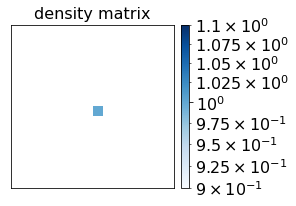

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

time: 1.55 s


In [38]:
initial_state_piqs_1 = piqs.ground(N1)
initial_state_piqs_2 = piqs.excited(N2)
plot_state(tensor(initial_state_piqs_1, initial_state_piqs_2))
np.real(tensor(initial_state_piqs_1, initial_state_piqs_2))

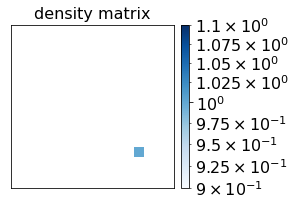

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

time: 1.48 s


In [39]:
initial_state_qutip_1 = Qobj(np.dot(np.dot(dicke_to_unc, initial_state_piqs_1), unc_to_dicke))
initial_state_qutip_2 = Qobj(np.dot(np.dot(dicke_to_unc, initial_state_piqs_2), unc_to_dicke))
plot_state(tensor(initial_state_qutip_1, initial_state_qutip_2))
np.real(tensor(initial_state_qutip_1, initial_state_qutip_2))

In [40]:
piqs_state = np.array(library.two_species_piqs_mesolve(N1,N2,initial_state_piqs_1,initial_state_piqs_2,2,g1=10,g2=20)[-1])
np.real(piqs_state)

array([[ 3.21324295e-02,  2.30470894e-05, -2.95007828e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.30470894e-05,  2.43348953e-02, -1.59335524e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.95007828e-05, -1.59335524e-05,  3.73300099e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.26433350e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  4.27523550e-02, -1.44963582e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.44963582e-05,  2.01010391e-02]])

time: 6.02 s


In [41]:
qutip_state = library.two_species_qutip_mesolve(N1,N2,initial_state_qutip_1,initial_state_qutip_2,2,g1=10,g2=20)[-1]
np.real(qutip_state)

array([[ 3.21324295e-02,  2.30470894e-05, -2.08602036e-05, ...,
         3.01935637e-06,  1.62025875e-03, -9.18790335e-07],
       [ 2.30470894e-05,  2.43348953e-02, -1.12667230e-05, ...,
        -1.84601381e-06, -8.73129946e-07, -1.17832921e-03],
       [-2.08602036e-05, -1.12667230e-05,  4.15339977e-02, ...,
         7.97254136e-07, -1.15898369e-05,  1.82909899e-06],
       ...,
       [ 3.01935637e-06, -1.84601381e-06,  7.97254136e-07, ...,
         2.23521698e-02, -1.46745659e-05, -1.74663786e-05],
       [ 1.62025875e-03, -8.73129946e-07, -1.15898369e-05, ...,
        -1.46745659e-05,  3.84891384e-02, -3.40798714e-05],
       [-9.18790335e-07, -1.17832921e-03,  1.82909899e-06, ...,
        -1.74663786e-05, -3.40798714e-05,  2.87687549e-02]])

time: 5.7 s


In [42]:
qutip_state_transformed = np.dot(np.dot(unc_dicke_two_phot, qutip_state), dicke_unc_two_phot)

time: 69.6 ms


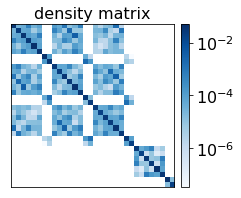

array([[ 3.21324295e-02+2.06602185e-20j,  2.30470894e-05+1.75184941e-05j,
        -2.95007828e-05-3.24124858e-05j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 2.30470894e-05-1.75184941e-05j,  2.43348953e-02+1.77439023e-19j,
        -1.59335524e-05-5.40026065e-05j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-2.95007828e-05+3.24124858e-05j, -1.59335524e-05+5.40026065e-05j,
         3.73300099e-02-6.27870243e-20j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       ...,
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         3.26433350e-02+2.38113476e-21j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.

time: 454 ms


In [43]:
plot_state(piqs_state)
np.array(piqs_state)

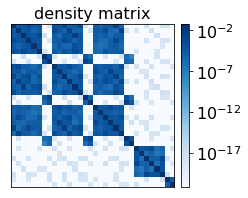

array([[ 3.21324295e-02+9.26093853e-20j,  2.30470894e-05+1.75184941e-05j,
        -2.95007828e-05-3.24124858e-05j, ...,
         1.93638202e-18+3.85978495e-18j, -1.62747431e-18+4.94365299e-19j,
        -3.37701904e-20+9.05515364e-21j],
       [ 2.30470894e-05-1.75184941e-05j,  2.43348953e-02+1.04940730e-19j,
        -1.59335524e-05-5.40026065e-05j, ...,
         6.44681223e-21-9.06119372e-20j,  3.55704635e-20-1.38305542e-21j,
         1.55032283e-20+8.50455369e-20j],
       [-2.95007828e-05+3.24124858e-05j, -1.59335524e-05+5.40026065e-05j,
         3.73300099e-02-7.93839836e-20j, ...,
         1.37625810e-19-4.46136906e-20j,  3.79105601e-21+5.56139088e-20j,
         1.96393746e-20+5.02075749e-20j],
       ...,
       [ 2.01716305e-18-4.20197029e-18j, -1.42168179e-20+7.53297947e-20j,
         1.11272967e-19+5.39725552e-20j, ...,
         3.26433350e-02+3.34328316e-20j, -4.69434773e-20-4.32254132e-18j,
        -6.90799990e-21+4.00026310e-20j],
       [-1.19145134e-18-2.62882156e-19j,  2.

time: 424 ms


In [44]:
plot_state(qutip_state_transformed)
qutip_state_transformed

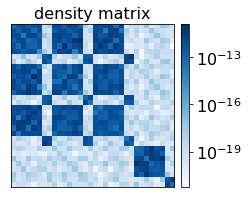

max value =  1.1303235703681767e-11
mean value =  4.279441771475324e-13


array([[-7.38537903e-14,  4.68379929e-13,  8.78193377e-13, ...,
         4.31827688e-18,  1.70090261e-18,  3.49631459e-20],
       [ 4.67911783e-13, -1.50269686e-13, -8.40892483e-13, ...,
         9.08409849e-20,  3.55973415e-20,  8.64470556e-20],
       [ 8.78347988e-13, -8.39688973e-13,  1.63574203e-14, ...,
         1.44676346e-19,  5.57429723e-20,  5.39120173e-20],
       ...,
       [ 4.66106222e-18,  7.66596105e-20,  1.23671783e-19, ...,
         1.47096324e-13,  4.32279621e-18,  4.05947158e-20],
       [ 1.22010791e-18,  2.56045311e-20,  1.01997878e-19, ...,
         4.27831435e-18,  3.47331345e-13,  2.03560811e-12],
       [ 2.96401487e-20,  2.45601828e-19,  1.29654382e-19, ...,
         2.00762395e-20,  2.03504808e-12,  6.86949504e-14]])

time: 397 ms


In [45]:
mask = (piqs_state == 0)
qutip_state_transformed = np.absolute(qutip_state_transformed)
piqs_state = np.absolute(piqs_state)
rel_diff = np.divide(qutip_state_transformed-piqs_state, qutip_state_transformed)
rel_diff[mask] = qutip_state_transformed[mask]
plot_state(rel_diff)
print('max value = ', np.absolute(rel_diff).max())
print('mean value = ', np.absolute(rel_diff).mean())
rel_diff